# Observations

Of the three drugs depicted in the graphs below, Capomulin appears to be the most effective at reducing tumors and increasing lifespan in mice studied. Tumor reduction was measured in mice treated with Capomulin, while all other drugs did not reduce tumor volume. While Infubinol and Ketapril measured some effect in site changes throughout treatment, the survival rates and volume reduction measurements show those drugs had a similar effect to placebo.


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
# import warnings
# warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# pd.read_csv is HOW WE READ the file(which is in parentheses) into the 
# variable we named on the left and saving it as a dataframe.
mouse_drug_data =pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

data = pd.merge(mouse_drug_data, clinical_trial_data,how="left",on="Mouse ID")
data.min()
data.max()

# data.rename(columns={"Tumor Volume"})



Mouse ID                   z969
Drug                  Zoniferol
Timepoint                    45
Tumor Volume (mm3)       78.567
Metastatic Sites              4
dtype: object

In [2]:
mouse_drug_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [3]:
mouse_drug_data["Mouse ID"].count()

250

In [4]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_volume = data.groupby(["Drug","Timepoint"])
mean_tumor_volume.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1780,x773,Placebo,35,55.192736,4
1781,x773,Placebo,40,55.987676,4
1782,x773,Placebo,45,58.634971,4
1802,y478,Placebo,40,65.971120,1


In [6]:
tumor_mean= mean_tumor_volume["Tumor Volume (mm3)"].mean()
df_tumor_mean=pd.DataFrame({"Tumor Volume (mm3)":tumor_mean})
df_tumor_mean.reset_index(inplace=True)

df_tumor_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [7]:

mean_table=df_tumor_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mean_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:

#Reduce to only the drugs I want to compare
mean_table=mean_table[["Capomulin","Infubinol","Ketapril","Placebo"]]
mean_table



Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


# Tumor Volume Change Over Time by Drug

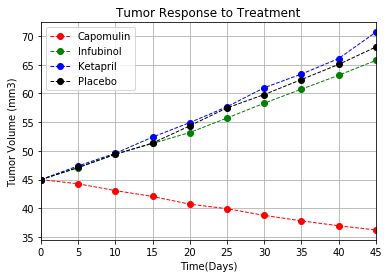

In [9]:

# generate the plot
cap_plot=mean_table["Capomulin"]
cap_plot.plot(grid=True,linewidth=1,color="r",marker='o',linestyle='dashed')

inf_plot=mean_table["Infubinol"]
inf_plot.plot(grid=True,linewidth=1,color="g",marker='o',linestyle='dashed')

ket_plot=mean_table["Ketapril"]
ket_plot.plot(grid=True,linewidth=1,color="b",marker='o',linestyle='dashed')

plc_plot=mean_table["Placebo"]
plc_plot.plot(grid=True,linewidth=1,color="black",marker='o',linestyle='dashed')


plt.legend()
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

plt.savefig("tumor_mean.png")

# Metastatic Site Changes Over Treatment by Drug

In [10]:
site_changes = data.groupby(["Drug","Timepoint"])


met_change= site_changes["Metastatic Sites"].mean()
df_site_changes=pd.DataFrame({"Metastatic Sites":met_change})
df_site_changes.reset_index(inplace=True)
df_site_changes

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [11]:

site_changes=df_site_changes.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')


site_changes=site_changes[["Capomulin","Infubinol","Ketapril","Placebo"]]
site_changes

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


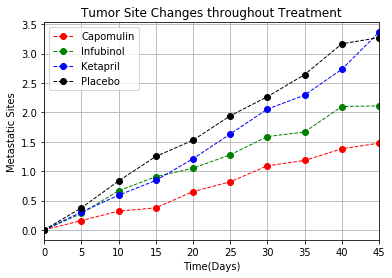

In [12]:
# generate the plot
cap_plot=site_changes["Capomulin"]
cap_plot.plot(grid=True,linewidth=1,color="r",marker='o',linestyle='dashed')

inf_plot=site_changes["Infubinol"]
inf_plot.plot(grid=True,linewidth=1,color="g",marker='o',linestyle='dashed')

ket_plot=site_changes["Ketapril"]
ket_plot.plot(grid=True,linewidth=1,color="b",marker='o',linestyle='dashed')

plc_plot=site_changes["Placebo"]
plc_plot.plot(grid=True,linewidth=1,color="black",marker='o',linestyle='dashed')


plt.legend()
plt.xlabel("Time(Days)")
plt.ylabel("Metastatic Sites")
plt.title("Tumor Site Changes throughout Treatment")

plt.savefig("site_changes.png")

# Survival Rate by Treatment


In [13]:
mouse_groups = data.groupby(["Drug","Timepoint"])
mouse_groups.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1780,x773,Placebo,35,55.192736,4
1781,x773,Placebo,40,55.987676,4
1782,x773,Placebo,45,58.634971,4
1802,y478,Placebo,40,65.971120,1


In [14]:
mouse_count=mouse_groups["Mouse ID"].count()
mouse_count_df=pd.DataFrame(mouse_count)
mouse_count_df.reset_index(inplace=True)
mouse_count_df

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [15]:

count_table=mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
count_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


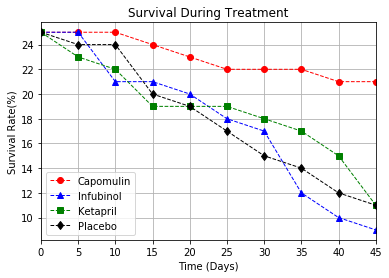

In [16]:
capomulin_mouse_plot=count_table["Capomulin"]
capomulin_mouse_plot.plot(grid=True,linewidth=1,color="r", marker='o', linestyle='dashed')

infubinol_mouse_plot=count_table["Infubinol"]
infubinol_mouse_plot.plot(grid=True, linewidth=1,color="b",marker="^",linestyle='dashed')

ketapril_mouse_plot=count_table["Ketapril"]
ketapril_mouse_plot.plot(grid=True, linewidth=1,color="g",marker="s",linestyle='dashed')

Placebo_mouse_plot=count_table["Placebo"]
Placebo_mouse_plot.plot(grid=True, linewidth=1,color="black",marker="d",linestyle='dashed')

plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig("mouse_survival.png")
# Show the Figure
plt.show()

In [17]:
drugs=mean_table.columns
drugs

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='Drug')

In [18]:
change=[]

for drug in drugs:
        time0=df_tumor_mean.loc[(df_tumor_mean["Drug"]==drug)&
                                (df_tumor_mean["Timepoint"]==0),
                                "Tumor Volume (mm3)"].sum()
        time45=df_tumor_mean.loc[(df_tumor_mean["Drug"]==drug)&
                                (df_tumor_mean["Timepoint"]==45),
                                "Tumor Volume (mm3)"].sum()
        drug_change=((time45-time0)/time0)*100
        change.append(drug_change)
change_table=pd.DataFrame({"Drug":drugs,"Change":change})
change_table


,Drug,Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


# Effectiveness of Treatments

C:\Users\bthch\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


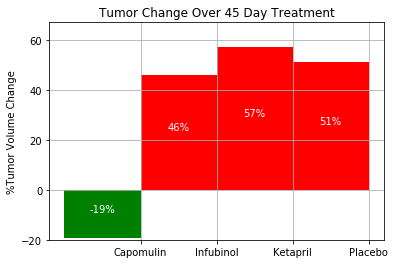

In [19]:
# Slice the data between passing and failing drugs
pass_drug=change_table.loc[(change_table["Drug"]=="Capomulin")] 
fail_drug=change_table.loc[(change_table["Drug"]=="Infubinol") |
                            (change_table["Drug"]=="Ketapril") |
                            (change_table["Drug"]=="Placebo") ]

# Orient widths. Add labels, tick marks, etc.
fig, ax = plt.subplots()

ax.set_ylim(min(change_table["Change"]), max(change_table["Change"])+10)

x=np.arange(-0.4,3,0.8)
width=0.8
ax.grid()
ax.set_xticks(np.arange(0.4,3,0.8)) 
ax.set_xticks(x + width )
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
ax.set_yticks(np.arange(-20,max(change_table["Change"])+10,20)) 

ax.set_ylabel("%Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")

# Use functions to label the percentages of changes and creat the bars
pass_bar=ax.bar(np.arange(0,len(pass_drug["Drug"]),10),pass_drug["Change"],color="g")
fail_bar=ax.bar(np.arange(0.8,len(fail_drug["Drug"]),0.8),fail_drug["Change"],color="r")

def barlabel(bars):
  
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%d%%' % int(height),
                ha='center', va='bottom',color="white")
    
# Call functions to implement the function calls
barlabel(pass_bar)
barlabel(fail_bar)

# Save the Figure
plt.savefig("change_bar.png")

# Show the Figure
fig.show()